In [2]:
import numpy as np
from matplotlib import pyplot as plt 
import keras

from keras.models import  Sequential
from keras.layers import Activation, Dense
from keras.utils import np_utils



Using TensorFlow backend.


In [3]:
mean_01 = np.array([1, 1])
cov_01 = np.array([[2.9, 1.4], [1.7, 1.5]])

mean_02 = np.array([4, 7])
cov_02 = np.array([[2, -0.7], [-0.7, 1.5]])

data_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
data_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print data_01.shape
print data_02.shape

(500, 2)
(500, 2)


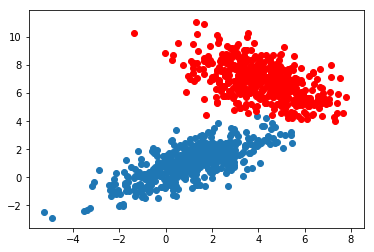

In [4]:
plt.figure(0)

plt.scatter(data_01[:, 0], data_01[:, 1])
plt.scatter(data_02[:, 0], data_02[:, 1], color='red')

plt.show()


In [5]:
all_data = np.zeros((1000, 3))

all_data[:500, :2] = data_01

all_data[500:, :2] = data_02
all_data[500:, -1] = 1

np.random.shuffle(all_data)
print all_data[:10]

[[ 2.28691102  9.87978625  1.        ]
 [-0.82157682 -0.63130593  0.        ]
 [-1.36009622 -0.88287735  0.        ]
 [ 2.34902966  1.22876537  0.        ]
 [ 5.51040348  7.65954477  1.        ]
 [ 2.18685988  2.22309667  0.        ]
 [-1.12081277 -0.54388899  0.        ]
 [ 3.90981671  7.43062997  1.        ]
 [ 0.02652679  0.34345831  0.        ]
 [ 4.04852531  2.36666017  0.        ]]


In [6]:
split = int(0.8 * all_data.shape[0])

train = all_data[:split]
test = all_data[split:]

print train.shape, test.shape

X_train = train[:, :-1]
X_test = test[:, :-1]

y_train = train[:,-1]# a vector 
y_test = test[:,-1]
print y_train.shape, y_test.shape
print y_train[:10]
print y_test[:10]
#Converts a class vector (integers) to binary class matrix.
y_train = np_utils.to_categorical(train[:, -1])# now a matrix 
y_test = np_utils.to_categorical(test[:, -1])

print '-'*80
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape
print y_train[:10]
print y_test[:10]


(800, 3) (200, 3)
(800,) (200,)
[ 1.  0.  0.  0.  1.  0.  0.  1.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  1.  1.  0.]
--------------------------------------------------------------------------------
(800, 2) (200, 2)
(800, 2) (200, 2)
[[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]]
[[ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]]


In [7]:
np_utils.to_categorical?

In [8]:
# Netwoek Model 
model  = Sequential()
# first layer must have a defined input shape
# afterwards, Keras does automatic shape inference

model.add(Dense(2, input_shape = (2,)))
model.add(Activation('softmax'))
#model.add(Activation('sigmoid'))# gives very less accuracy 

#Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 6.0
Trainable params: 6.0
Non-trainable params: 0.0
_________________________________________________________________


In [9]:
hist = model.fit(X_train, y_train,
                epochs=50,
                shuffle=True,
                validation_data=(X_test, y_test), verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/50
0s - loss: 0.5945 - acc: 0.6388 - val_loss: 0.5807 - val_acc: 0.6200
Epoch 2/50
0s - loss: 0.5347 - acc: 0.6675 - val_loss: 0.5320 - val_acc: 0.6400
Epoch 3/50
0s - loss: 0.4900 - acc: 0.6875 - val_loss: 0.4937 - val_acc: 0.6800
Epoch 4/50
0s - loss: 0.4540 - acc: 0.7075 - val_loss: 0.4615 - val_acc: 0.6950
Epoch 5/50
0s - loss: 0.4242 - acc: 0.7325 - val_loss: 0.4320 - val_acc: 0.7150
Epoch 6/50
0s - loss: 0.3990 - acc: 0.7838 - val_loss: 0.4087 - val_acc: 0.7750
Epoch 7/50
0s - loss: 0.3774 - acc: 0.8263 - val_loss: 0.3890 - val_acc: 0.8050
Epoch 8/50
0s - loss: 0.3587 - acc: 0.8488 - val_loss: 0.3710 - val_acc: 0.8550
Epoch 9/50
0s - loss: 0.3423 - acc: 0.8687 - val_loss: 0.3550 - val_acc: 0.8700
Epoch 10/50
0s - loss: 0.3279 - acc: 0.8837 - val_loss: 0.3404 - val_acc: 0.8750
Epoch 11/50
0s - loss: 0.3149 - acc: 0.9062 - val_loss: 0.3281 - val_acc: 0.8850
Epoch 12/50
0s - loss: 0.3030 - acc: 0.9163 - val_loss: 0.3166 - val_acc

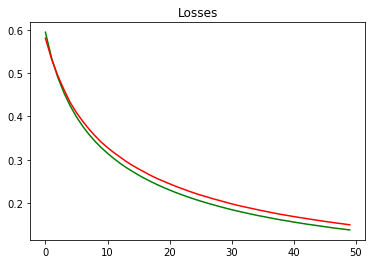

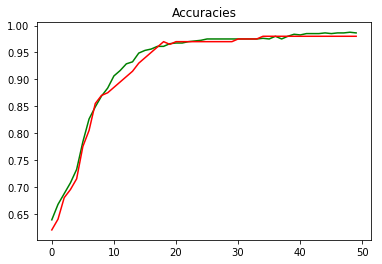

In [10]:
h_data = hist.history
# we can check accuracy with increasing epochs 
plt.figure(0)
plt.title('Losses')
plt.plot(h_data['loss'], 'green')
plt.plot(h_data['val_loss'], 'red')

plt.figure(1)
plt.title('Accuracies')
plt.plot(h_data['acc'], 'green')
plt.plot(h_data['val_acc'], 'red')

plt.show()



# moons dataset from sklearn

In [11]:
import sklearn
from sklearn.datasets import make_moons

In [12]:
x,y = make_moons(n_samples=1000)

In [13]:
print x 


[[-0.40078488  0.91617219]
 [ 0.71924261  0.694759  ]
 [ 1.54999593 -0.33516734]
 ..., 
 [ 0.84014643 -0.48714074]
 [-0.8990086   0.43793098]
 [-0.55524302  0.83168816]]


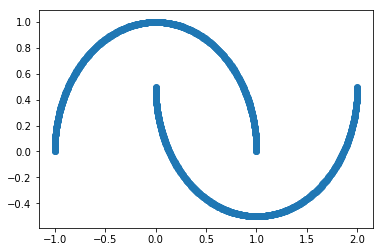

In [14]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [15]:
print y


[0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0
 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1
 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0
 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1
 1 0 0 0 1 0 1 0 1 1 1 1 

In [16]:
 y = np_utils.to_categorical(y)
print y

[[ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]]


In [17]:
x,y  = make_moons(n_samples=1000, noise=0.1,shuffle=True)

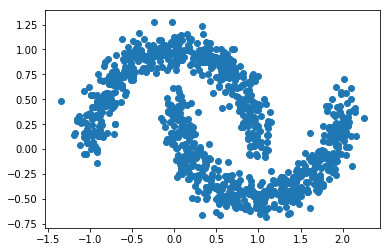

In [18]:
plt.figure(0)
y = np_utils.to_categorical(y)
plt.scatter(x[:,0],x[:,1])
plt.show()


In [31]:
model = Sequential()

model.add(Dense(3, input_shape=(2,)))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 8         
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_7 (Activation)    (None, 2)                 0         
Total params: 23.0
Trainable params: 23.0
Non-trainable params: 0.0
_________________________________________________________________


In [32]:

hist = model.fit(x[:800], y[:800],
                epochs=100,
                shuffle=True,
                validation_data=(x[800:], y[800:]), verbose=2)#batch_size >>>it takes epoch batch wise..to give less load to memory

Train on 800 samples, validate on 200 samples
Epoch 1/100
0s - loss: 0.7999 - acc: 0.5038 - val_loss: 0.8025 - val_acc: 0.4850
Epoch 2/100
0s - loss: 0.7765 - acc: 0.5038 - val_loss: 0.7785 - val_acc: 0.4850
Epoch 3/100
0s - loss: 0.7559 - acc: 0.5038 - val_loss: 0.7595 - val_acc: 0.4850
Epoch 4/100
0s - loss: 0.7403 - acc: 0.5038 - val_loss: 0.7423 - val_acc: 0.4850
Epoch 5/100
0s - loss: 0.7268 - acc: 0.5038 - val_loss: 0.7292 - val_acc: 0.4850
Epoch 6/100
0s - loss: 0.7162 - acc: 0.5038 - val_loss: 0.7190 - val_acc: 0.4850
Epoch 7/100
0s - loss: 0.7079 - acc: 0.5038 - val_loss: 0.7104 - val_acc: 0.4850
Epoch 8/100
0s - loss: 0.7013 - acc: 0.5038 - val_loss: 0.7031 - val_acc: 0.4850
Epoch 9/100
0s - loss: 0.6959 - acc: 0.5038 - val_loss: 0.6973 - val_acc: 0.4850
Epoch 10/100
0s - loss: 0.6913 - acc: 0.5038 - val_loss: 0.6930 - val_acc: 0.4850
Epoch 11/100
0s - loss: 0.6877 - acc: 0.5038 - val_loss: 0.6888 - val_acc: 0.4850
Epoch 12/100
0s - loss: 0.6844 - acc: 0.5038 - val_loss: 0.68

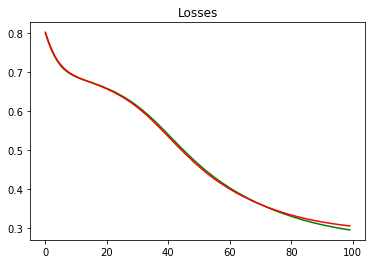

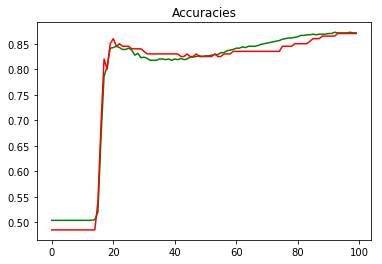

In [33]:
h_data = hist.history

plt.figure(0)
plt.title('Losses')
plt.plot(h_data['loss'], 'green')
plt.plot(h_data['val_loss'], 'red')

plt.figure(1)
plt.title('Accuracies')
plt.plot(h_data['acc'], 'green')
plt.plot(h_data['val_acc'], 'red')

plt.show()

In [34]:
model.layers

# Model function

In [23]:
from keras.models import Model

In [24]:
model.input

<tf.Tensor 'dense_2_input:0' shape=(?, 2) dtype=float32>

In [25]:
m = Model(inputs=model.input, outputs=model.layers[1].output)
# prediction depends on the model layer 

In [26]:
#m.predict()-->>>Generates output predictions for the input samples.Computation is done in batches.

In [27]:
o = m.predict(x)
print o.shape

(1000, 3)


In [28]:
print o

[[ 0.32592717  0.27747425  0.58715779]
 [ 0.46041134  0.51748723  0.53406018]
 [ 0.21488394  0.21061273  0.73095912]
 ..., 
 [ 0.18280251  0.15948847  0.74869901]
 [ 0.52398139  0.61195827  0.49777454]
 [ 0.22019175  0.15534098  0.67035848]]


In [29]:
print x

[[ 0.94101702  0.47379912]
 [ 0.1963033   0.02391673]
 [-0.91576221  0.33163653]
 ..., 
 [-0.74513934  0.47004335]
 [ 0.15581203 -0.11097189]
 [ 0.7210108   0.68908389]]


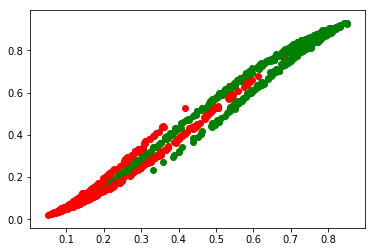

In [30]:


for ix in range(o.shape[0]):
    if y[ix, 0] == 1:
        plt.scatter(o[ix, 0], o[ix, 1], color='red')
    else:
        plt.scatter(o[ix, 0], o[ix, 1], color='green')
plt.show()

